In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [46]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape    # Rows - 1599 , Columns - 12

(1599, 12)

In [4]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df1 = df.copy()

In [9]:
df.duplicated().sum()

240

In [10]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### EDA

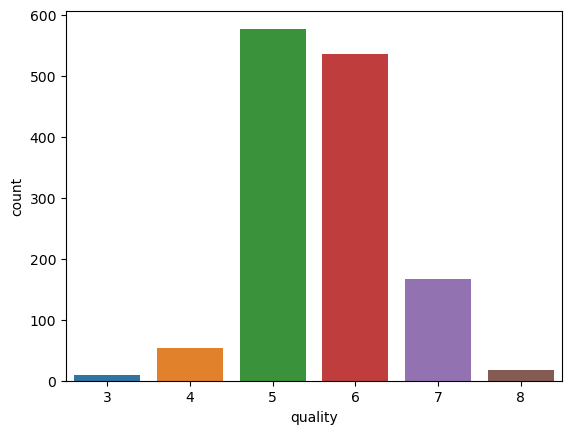

In [11]:
sns.countplot(x = df['quality'])
plt.show()

### Inference
1) It shows that we have more 5 quality then rest of this

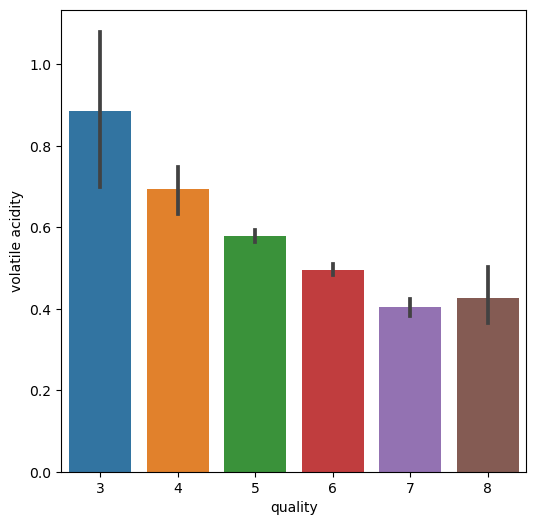

In [12]:
## volatile acidity vs Quality
plt.figure(figsize = (6,6))
sns.barplot(x = df['quality'],y = df['volatile acidity'])
plt.show()

### Inference
1) Volatile Acidity and Quality are inversionally propotiate <br>
2) As the Volatile Acidity increases it decreses the quality of wine and vice versa <br>

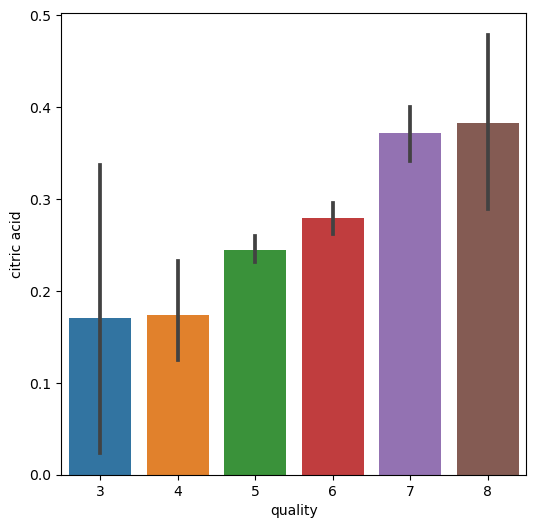

In [13]:
## citric acidi vs Quality
plt.figure(figsize = (6,6))
sns.barplot(x = df['quality'],y = df['citric acid'])
plt.show()

### Inference
1) They are directly propotional <br>
2) If the citric acid is high it will increase the qaulity of wine <br>

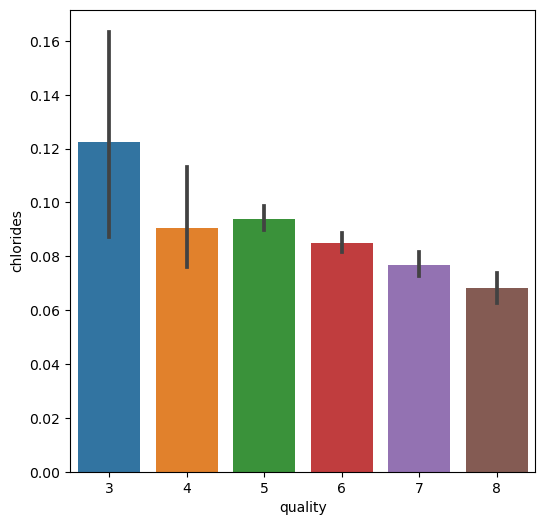

In [14]:
#### Fixed_Acidity vs Quality

plt.figure(figsize = (6,6))
sns.barplot(x = df['quality'],y = df['chlorides'])
plt.show()

### Inference
1) Chlorides and Quality are inversionally propotiate <br>
2) As the Chlorides increases it decreses the quality of wine and vice versa <br>

### Correlation

In [15]:
corr = df.corr()

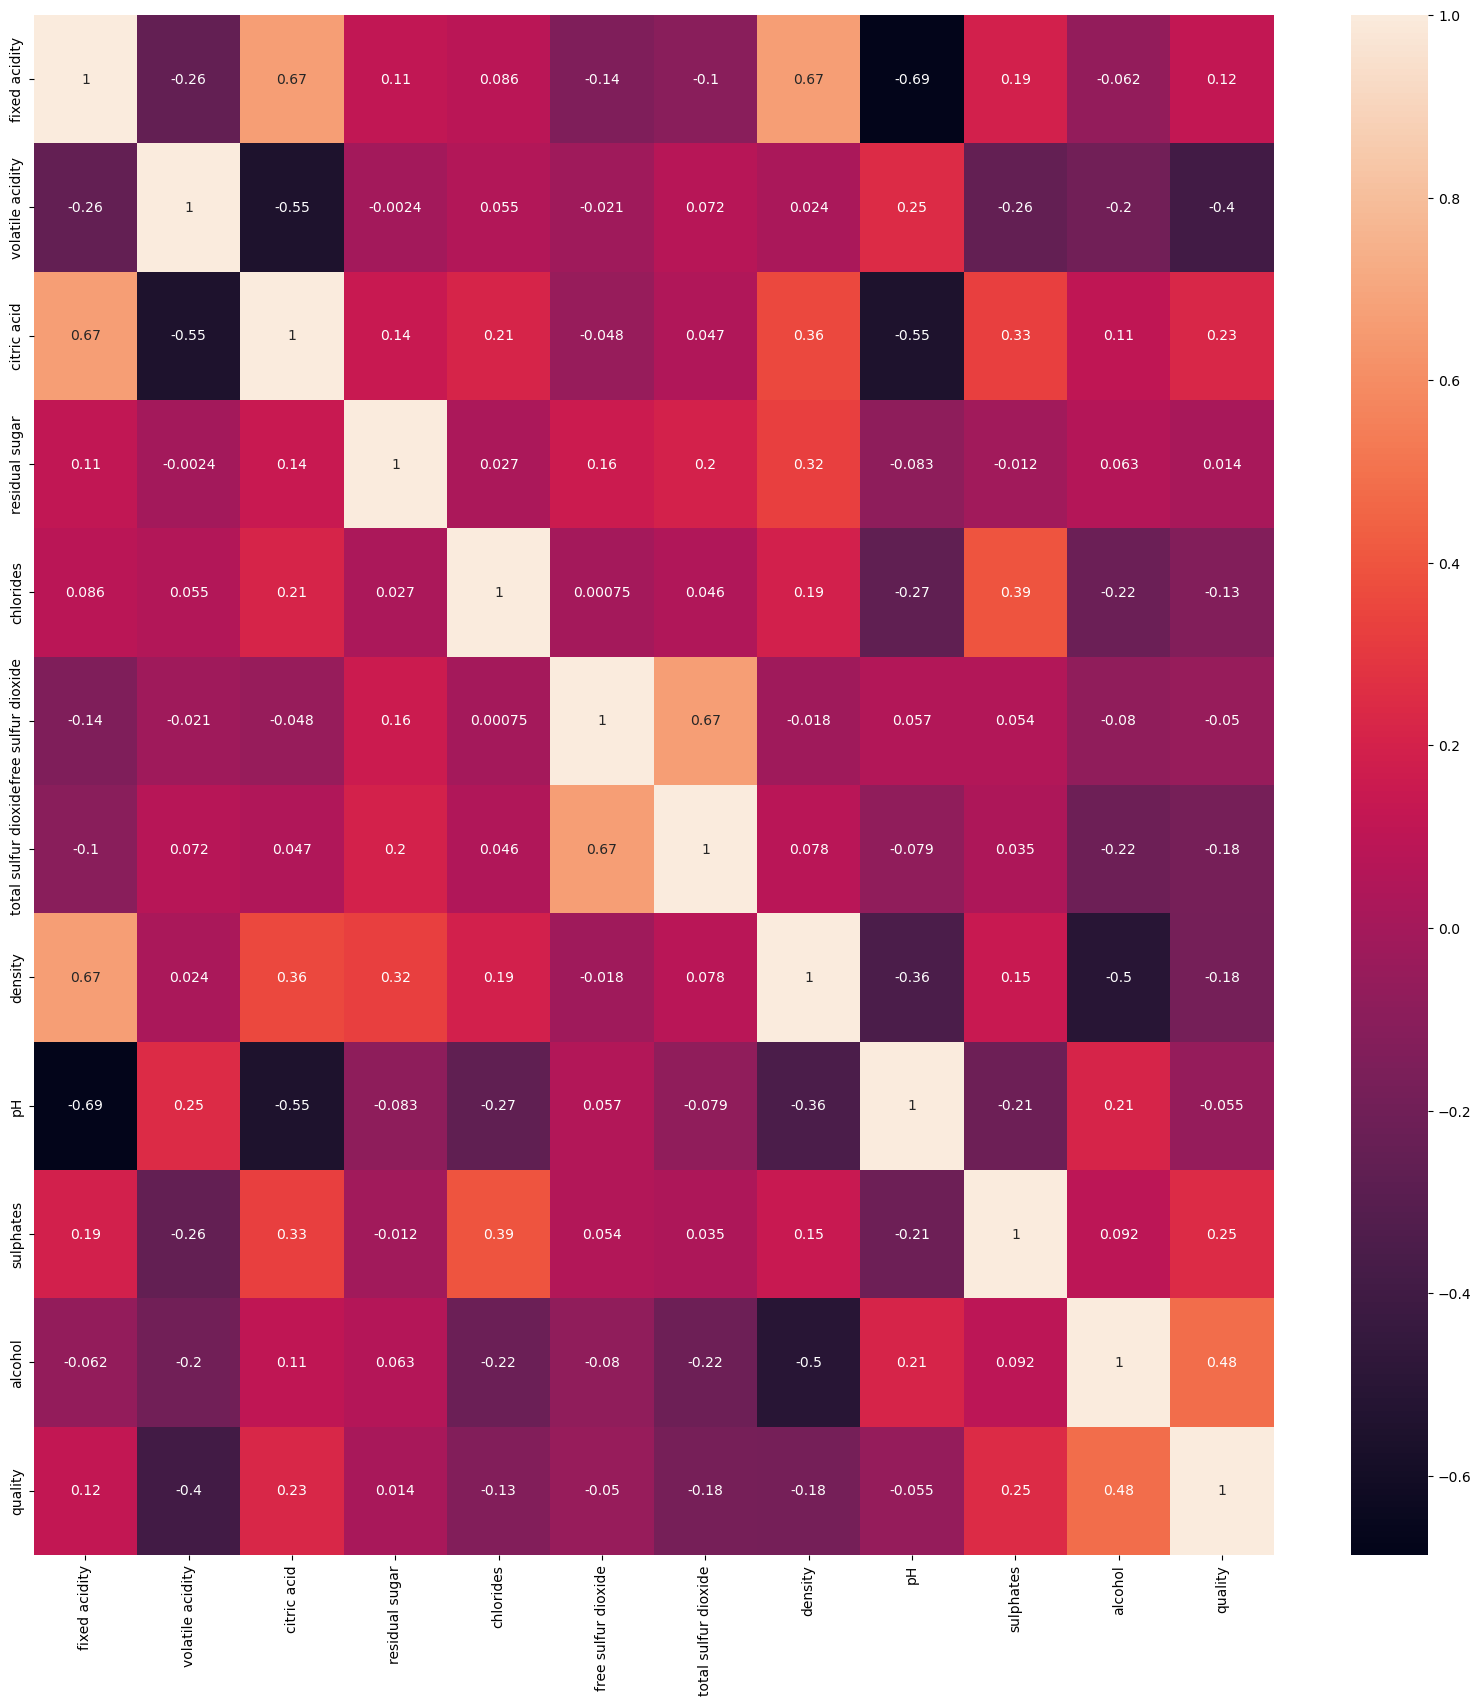

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)
plt.show()

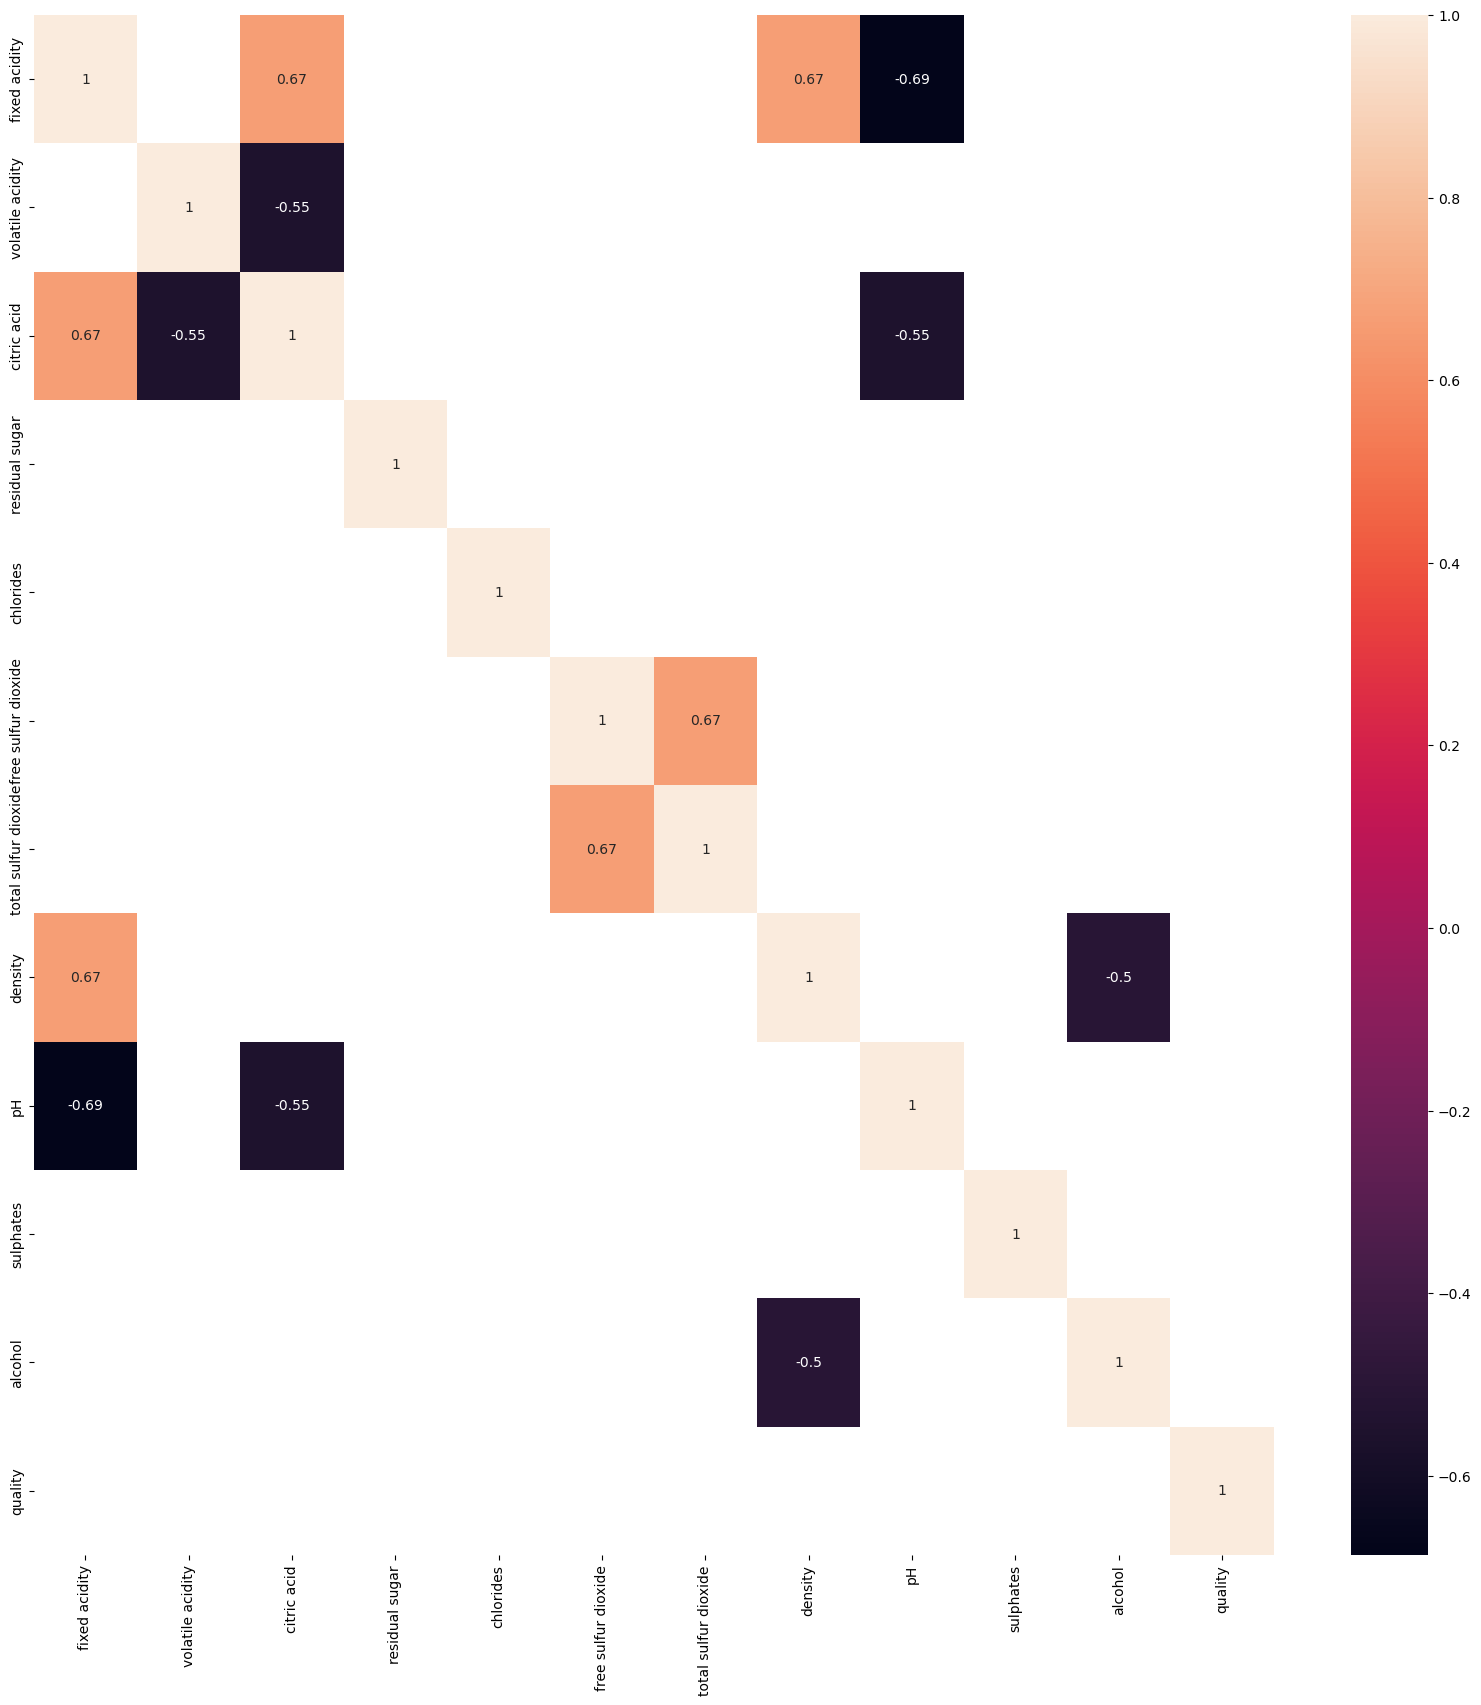

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(corr[abs(corr)>=0.5],annot=True)
plt.show()

### Inference
1) Citric Acid and Fixed Acidity are highly correlated <br>
2) Density and Fixed Acidity are highly correlated   <br>

### Outliers

In [18]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [19]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

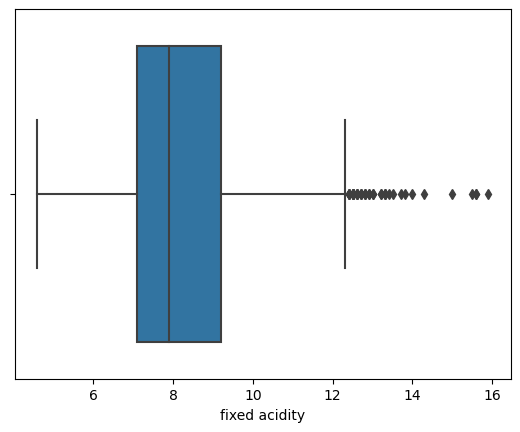

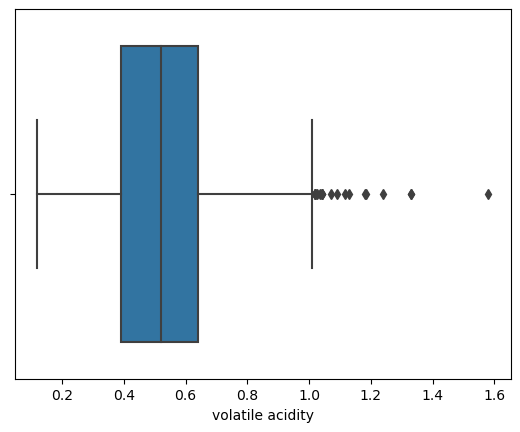

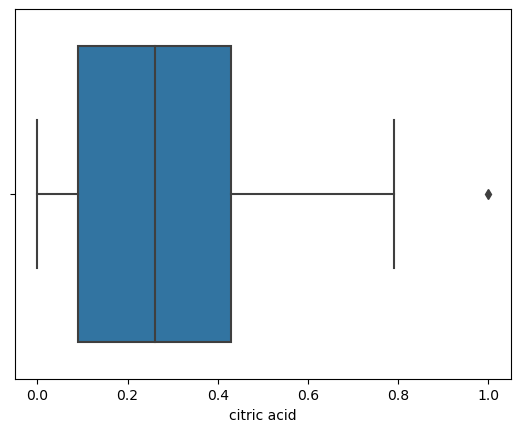

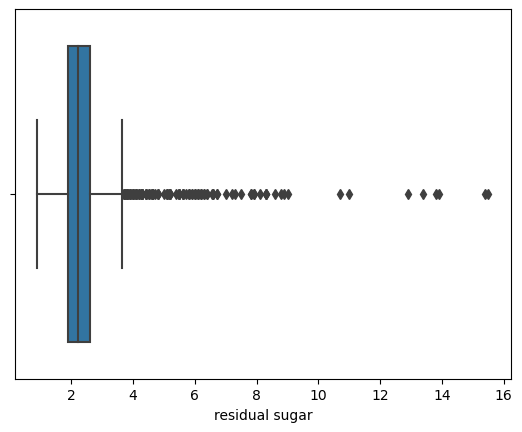

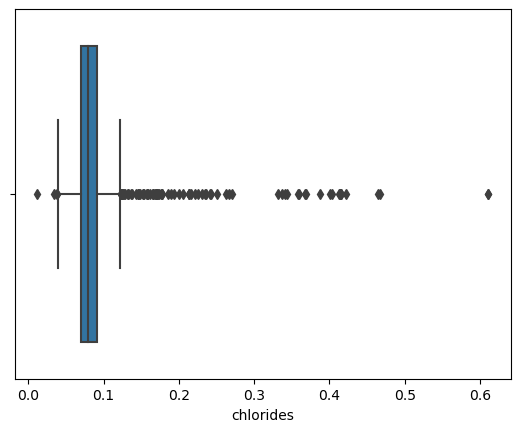

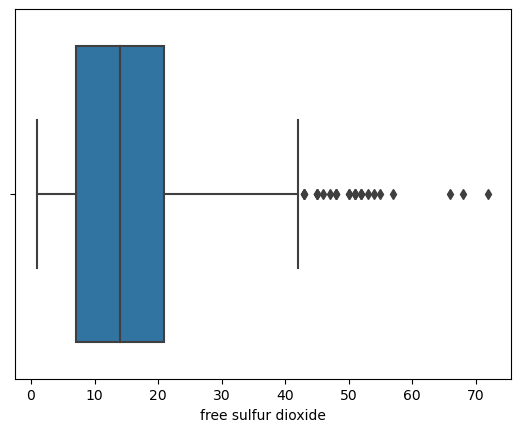

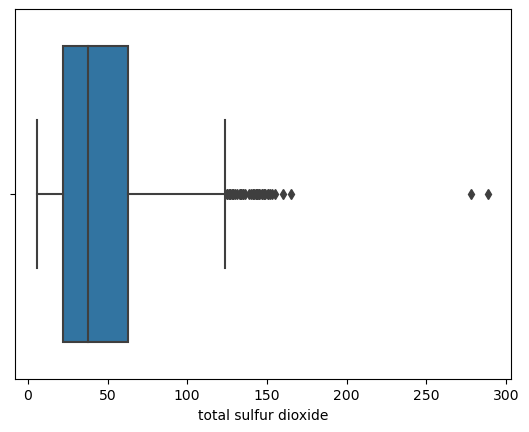

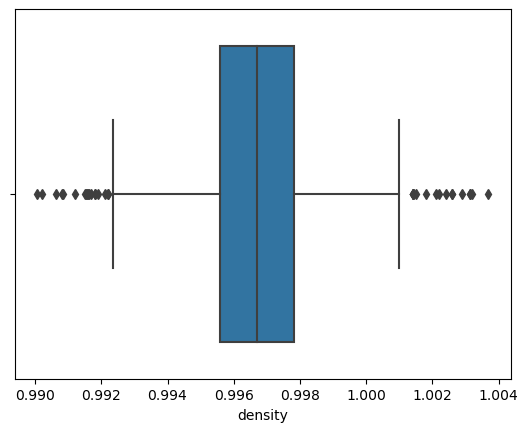

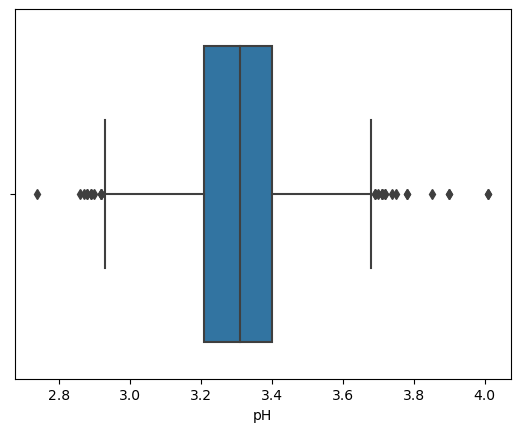

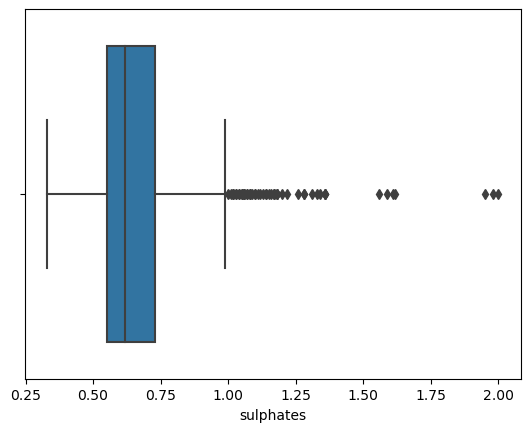

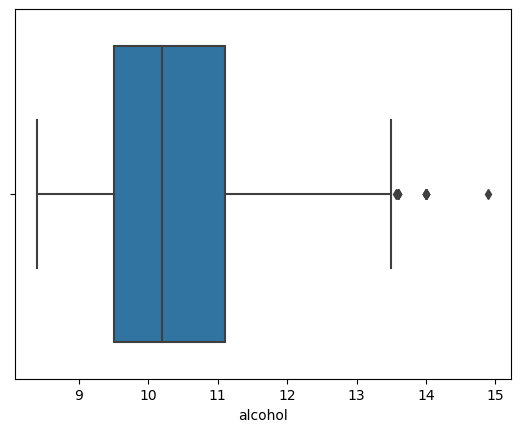

In [20]:
for i in cols:
    sns.boxplot(x = df[i])
    plt.show()

In [21]:
df.describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,95%,96%,97%,98%,99%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,5.200000,5.51600,5.774000,6.100000,7.9000,11.7100,11.968000,12.326000,12.60000,13.24200,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.200000,0.23000,0.247400,0.270000,0.5200,0.8505,0.880000,0.910000,0.96500,1.02920,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.000000,0.00000,0.000000,0.000000,0.2600,0.6000,0.636800,0.660000,0.68000,0.70420,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.400000,1.40000,1.400000,1.600000,2.2000,4.8000,5.500000,6.000000,6.59200,8.30000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.042000,0.04600,0.049000,0.053000,0.0790,0.1376,0.163720,0.180080,0.23584,0.36842,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,3.000000,3.00000,3.000000,4.000000,14.0000,35.0000,37.000000,39.000000,42.00000,50.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,8.000000,9.00000,10.000000,11.000000,38.0000,113.0000,120.000000,127.000000,135.84000,145.84000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.991872,0.99258,0.993175,0.993569,0.9967,0.9998,1.000084,1.000243,1.00060,1.00140,1.00369
pH,1359.0,3.309787,0.155036,2.74000,2.940000,3.00000,3.030000,3.060000,3.3100,3.5700,3.580000,3.600000,3.63000,3.70420,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.430000,0.44000,0.450000,0.470000,0.6200,0.9400,0.996800,1.060000,1.13840,1.28000,2.00000


In [22]:
lower_end = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
upper_end = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

In [23]:
def outlier_treatment_le(x):      # le = lower end
    x = x.clip(lower=x.quantile(0.01))
    return x

def outlier_treatment_ue(x):       # ue = upper end
    x = x.clip(upper=x.quantile(0.99))
    return x

In [24]:
df[lower_end] = df[lower_end].apply(outlier_treatment_le)
df[upper_end] = df[upper_end].apply(outlier_treatment_ue)

In [25]:
df.describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,95%,96%,97%,98%,99%,max
fixed acidity,1359.0,8.301904,1.695255,5.200000,5.200000,5.51600,5.774000,6.100000,7.9000,11.7100,11.968000,12.326000,12.60000,13.217640,13.24200
volatile acidity,1359.0,0.528244,0.177268,0.200000,0.200000,0.23000,0.247400,0.270000,0.5200,0.8505,0.880000,0.910000,0.96500,1.026764,1.02920
citric acid,1359.0,0.271706,0.193923,0.000000,0.000000,0.00000,0.000000,0.000000,0.2600,0.6000,0.636800,0.660000,0.68000,0.701764,0.70420
residual sugar,1359.0,2.494040,1.139184,1.400000,1.400000,1.40000,1.400000,1.600000,2.2000,4.8000,5.500000,6.000000,6.59200,8.300000,8.30000
chlorides,1359.0,0.087399,0.043455,0.042000,0.042000,0.04600,0.049000,0.053000,0.0790,0.1376,0.163720,0.180080,0.23584,0.368176,0.36842
free sulfur dioxide,1359.0,15.835173,10.195767,3.000000,3.000000,3.00000,3.000000,4.000000,14.0000,35.0000,37.000000,39.000000,42.00000,50.000000,50.00000
total sulfur dioxide,1359.0,46.573407,32.184686,8.000000,8.000000,9.00000,10.000000,11.000000,38.0000,113.0000,120.000000,127.000000,135.84000,145.352800,145.84000
density,1359.0,0.996705,0.001817,0.991872,0.991894,0.99258,0.993175,0.993569,0.9967,0.9998,1.000084,1.000243,1.00060,1.001400,1.00140
pH,1359.0,3.309241,0.150195,2.940000,2.940000,3.00000,3.030000,3.060000,3.3100,3.5700,3.580000,3.600000,3.63000,3.701764,3.70420
sulphates,1359.0,0.656306,0.155388,0.430000,0.430000,0.44000,0.450000,0.470000,0.6200,0.9400,0.996800,1.060000,1.13840,1.280000,1.28000


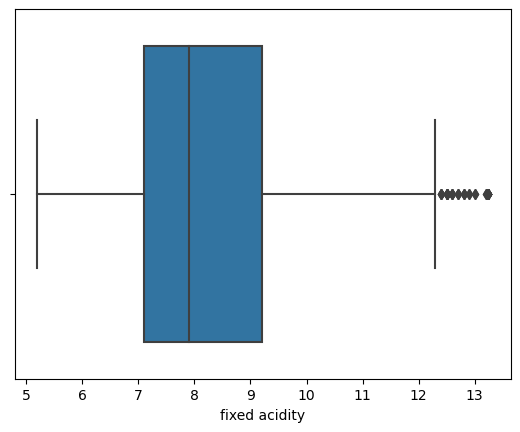

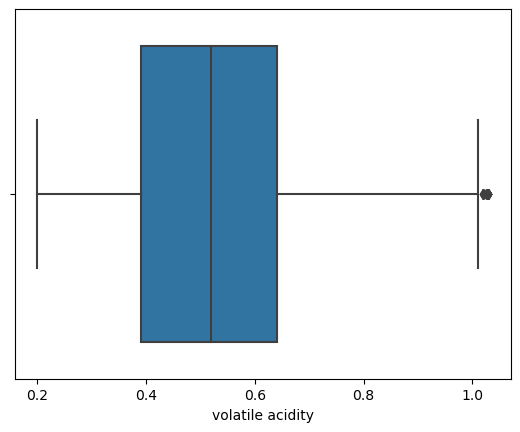

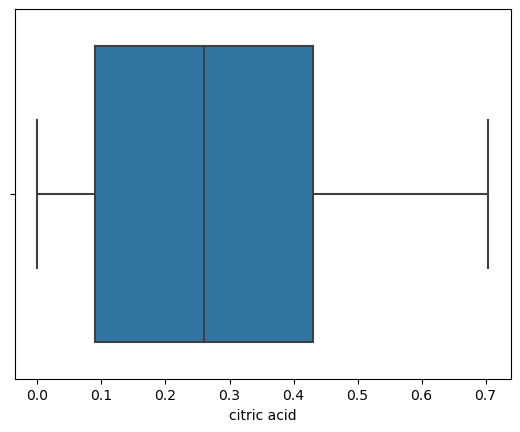

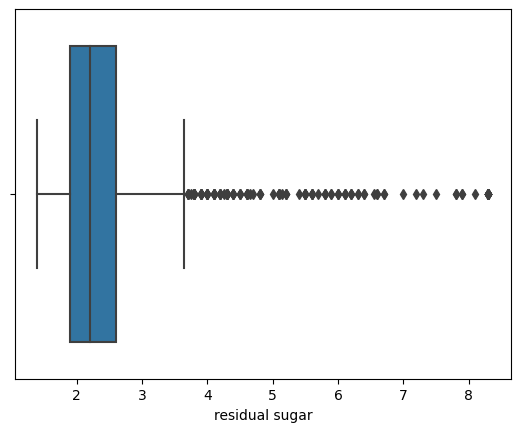

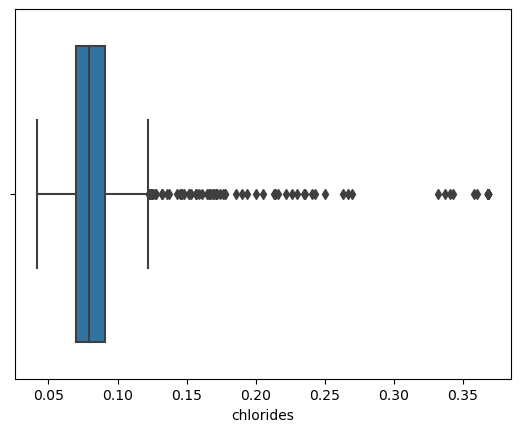

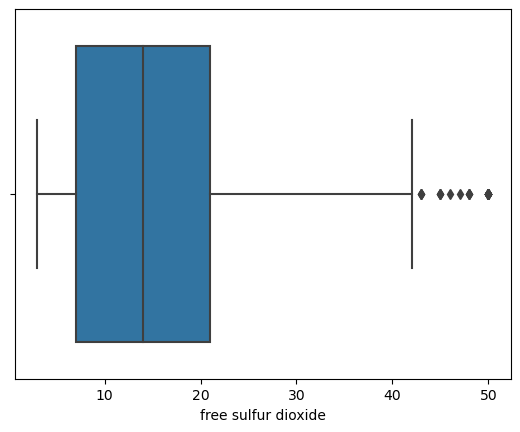

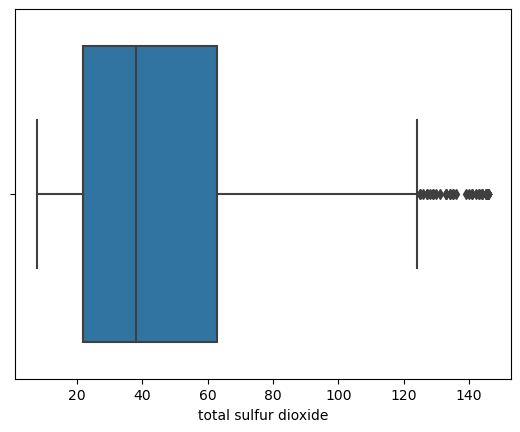

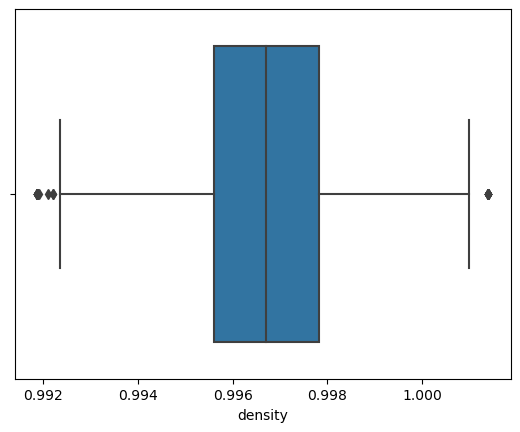

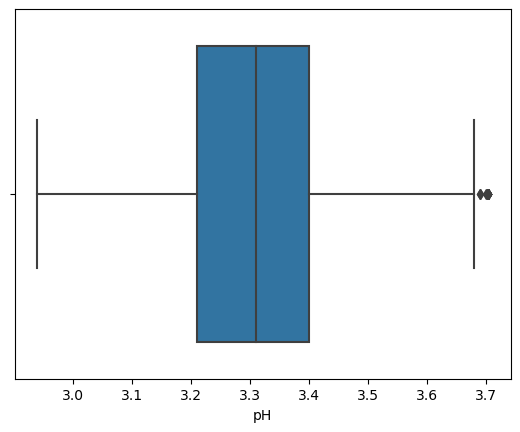

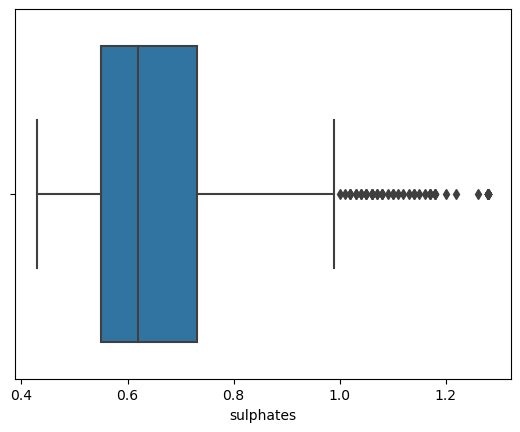

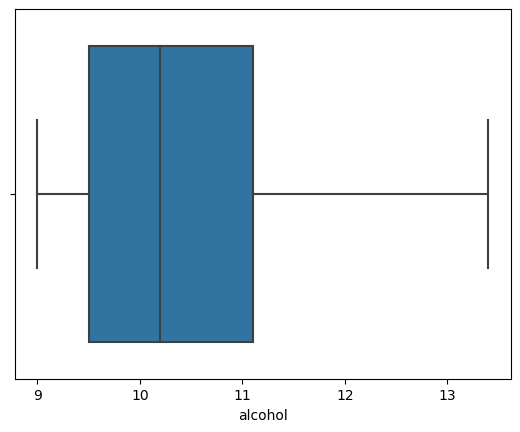

In [26]:
for i in cols:     # ouliert treat krne ke bad bhi deck rhe hai 
    sns.boxplot(x = df[i])
    plt.show()    

### Spliting x and y

In [27]:
x = df.drop('quality',axis = 1)        
y = df['quality'].apply(lambda x : 1 if x>=7 else 0)                 # Considering 1 as good (7,8) and 0 as bad (less than 7)
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(1359, 11)
(1359,)


In [28]:
y.sample(10)    # checking y after replacing with 1 and 0

580     0
621     0
845     0
459     0
439     0
1230    0
1472    0
269     0
296     0
280     0
Name: quality, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 8)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1087, 11)
(272, 11)
(1087,)
(272,)


### Using Random Forest Classifier

In [31]:
def eval_model(model,x_train,y_train,x_test,y_test,mname):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    cm = confusion_matrix(y_test,ypred)
    cr = classification_report(y_test,ypred)
    res_df = pd.DataFrame({'Train_Acc':train_acc,'Test_Acc':test_acc},index=[mname])
    print('Confusion_Matrix\n',cm)
    print('Classification Report\n',cr)
    return res_df

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [33]:
rf = RandomForestClassifier(n_estimators=80,criterion='gini',max_depth=12,min_samples_split=15)
rf_res = eval_model(rf,x_train,y_train,x_test,y_test,'Random Forest')
rf_res

Confusion_Matrix
 [[229   6]
 [ 27  10]]
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       235
           1       0.62      0.27      0.38        37

    accuracy                           0.88       272
   macro avg       0.76      0.62      0.66       272
weighted avg       0.86      0.88      0.86       272



,Train_Acc,Test_Acc
Random Forest,0.942042,0.878676


In [34]:
model = RandomForestClassifier()

In [35]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
rf = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=15,min_samples_split=10)
res2 = eval_model(rf,x_train,y_train,x_test,y_test,'Random Forest')
res2

Confusion_Matrix
 [[229   6]
 [ 25  12]]
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.97      0.94       235
           1       0.67      0.32      0.44        37

    accuracy                           0.89       272
   macro avg       0.78      0.65      0.69       272
weighted avg       0.87      0.89      0.87       272



,Train_Acc,Test_Acc
Random Forest,0.961362,0.886029


In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
hparams_rf = {'criterion':['gini','entropy'],'n_estimators':[60,70,80,90],
             'max_depth':[4,5,6,7,8],
             'min_samples_split':[8,10,12,15]}

In [39]:
rf = RandomForestClassifier()  

gs1 = GridSearchCV(estimator=rf,param_grid=hparams_rf,scoring='accuracy',cv=5)
gs1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_samples_split': [8, 10, 12, 15],
                         'n_estimators': [60, 70, 80, 90]},
             scoring='accuracy')

In [40]:
print(gs1.best_params_)
print(gs1.best_estimator_)
print(gs1.best_score_)

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 10, 'n_estimators': 60}
RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_split=10,
                       n_estimators=60)
0.8831733818120323


In [41]:
rf2 = RandomForestClassifier(**gs1.best_params_)
rf2.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_split=10,
                       n_estimators=60)

### Prediction Function

In [47]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf2.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine


D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [48]:
input_data = (7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf2.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine


D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
